# Datasets Preparations

Upload the ```kaggle.json``` to be able to import the Kaggle datasets

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmadrafianto","key":"222aab783a7c99308020bc2010cdf96a"}'}

In [2]:
! mkdir ~/.kaggle # Make a directory for the .json file
! cp kaggle.json ~/.kaggle/ # Copy the .json file to the .kaggle directory
! chmod 600 ~/.kaggle/kaggle.json # GIve user permission to read/write file

! mkdir dataset # Make a directory for the dataset

! kaggle datasets download -d yudhaislamisulistya/plants-type-datasets # Download the kaggle datasets

! unzip plants-type-datasets.zip -d dataset # Unzip the kaggle dataset zip to the 'dataset' directory

! rm 'plants-type-datasets.zip' # Delete the zip file

Streaming output truncated to the last 5000 lines.
  inflating: dataset/split_ttv_dataset_type_of_plants/Train_Set_Folder/tobacco/aug_0_6496.jpg  
  inflating: dataset/split_ttv_dataset_type_of_plants/Train_Set_Folder/tobacco/aug_0_6498.jpg  
  inflating: dataset/split_ttv_dataset_type_of_plants/Train_Set_Folder/tobacco/aug_0_6500.jpg  
  inflating: dataset/split_ttv_dataset_type_of_plants/Train_Set_Folder/tobacco/aug_0_6503.jpg  
  inflating: dataset/split_ttv_dataset_type_of_plants/Train_Set_Folder/tobacco/aug_0_6527.jpg  
  inflating: dataset/split_ttv_dataset_type_of_plants/Train_Set_Folder/tobacco/aug_0_6528.jpg  
  inflating: dataset/split_ttv_dataset_type_of_plants/Train_Set_Folder/tobacco/aug_0_6530.jpg  
  inflating: dataset/split_ttv_dataset_type_of_plants/Train_Set_Folder/tobacco/aug_0_6532.jpg  
  inflating: dataset/split_ttv_dataset_type_of_plants/Train_Set_Folder/tobacco/aug_0_6540.jpg  
  inflating: dataset/split_ttv_dataset_type_of_plants/Train_Set_Folder/tobacco/aug_0_

# Importing Library

In [40]:
import matplotlib.pyplot as plt
import os

import numpy as np

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

# Loading Datasets

Specify the path of each ```train```, ```test```, and ```validation``` datasets

In [4]:
path = '/content/dataset/split_ttv_dataset_type_of_plants/' # Specify the main directory for the splitting of labels
train_path = path + 'Train_Set_Folder'
test_path = path + 'Test_Set_Folder'
val_path = path + 'Validation_Set_Folder'

In [5]:
batch_size = 32
img_height = 150
img_width = 150

In [6]:
# Train Datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Test Datasets
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_path,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Validation Datasets
val_ds = tf.keras.utils.image_dataset_from_directory(
  val_path,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 23972 files belonging to 30 classes.
Found 2998 files belonging to 30 classes.
Found 3030 files belonging to 30 classes.
['aloevera', 'banana', 'bilimbi', 'cantaloupe', 'cassava', 'coconut', 'corn', 'cucumber', 'curcuma', 'eggplant', 'galangal', 'ginger', 'guava', 'kale', 'longbeans', 'mango', 'melon', 'orange', 'paddy', 'papaya', 'peper chili', 'pineapple', 'pomelo', 'shallot', 'soybeans', 'spinach', 'sweet potatoes', 'tobacco', 'waterapple', 'watermelon']


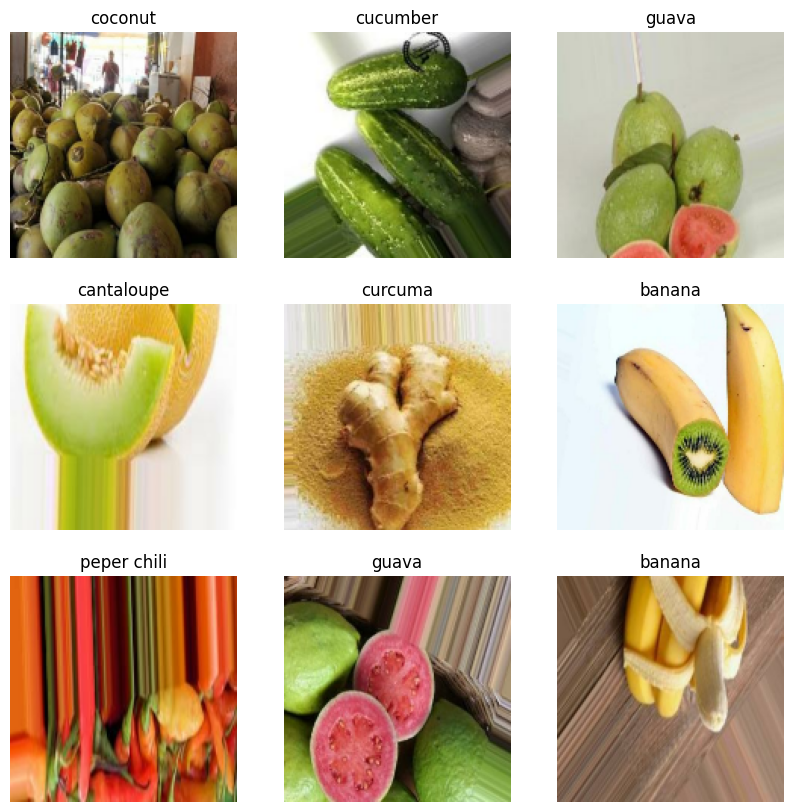

In [7]:
# Plot the sampled plant datasets

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


# EfficientNetB0 Model

EfficientNetB0 is part of the EfficientNet family, which was introduced to provide better performance with fewer parameters compared to traditional convolutional neural networks (CNNs).

In [24]:
from keras.models import Sequential, load_model
from keras.layers import Dropout, Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)

efnb0 = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3), classes=30)

model = Sequential()
model.add(efnb0)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(30, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[early_stopping])

Epoch 1/10
750/750 [==============================] - 145s 149ms/step - loss: 0.6212 - accuracy: 0.8115 - val_loss: 0.2643 - val_accuracy: 0.9036
Epoch 2/10
750/750 [==============================] - 111s 147ms/step - loss: 0.2466 - accuracy: 0.9185 - val_loss: 0.3383 - val_accuracy: 0.9112
Epoch 3/10
750/750 [==============================] - 110s 146ms/step - loss: 0.1749 - accuracy: 0.9431 - val_loss: 0.2055 - val_accuracy: 0.9350
Epoch 4/10
750/750 [==============================] - 112s 148ms/step - loss: 0.1519 - accuracy: 0.9487 - val_loss: 0.2625 - val_accuracy: 0.9248
Epoch 5/10
750/750 [==============================] - 110s 146ms/step - loss: 0.1224 - accuracy: 0.9596 - val_loss: 0.2473 - val_accuracy: 0.9333
Epoch 6/10
750/750 [==============================] - 117s 155ms/step - loss: 0.1335 - accuracy: 0.9562 - val_loss: 0.1591 - val_accuracy: 0.9525
Epoch 7/10
750/750 [==============================] - 110s 146ms/step - loss: 0.1003 - accuracy: 0.9677 - val_loss: 0.1299 -

In [25]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 5, 5, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_6  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_6 (Dropout)         (None, 1280)              0         
                                                                 
 dense_5 (Dense)             (None, 30)                38430     
                                                                 
Total params: 4088001 (15.59 MB)
Trainable params: 4045978 (15.43 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________________


# Model Evaluation

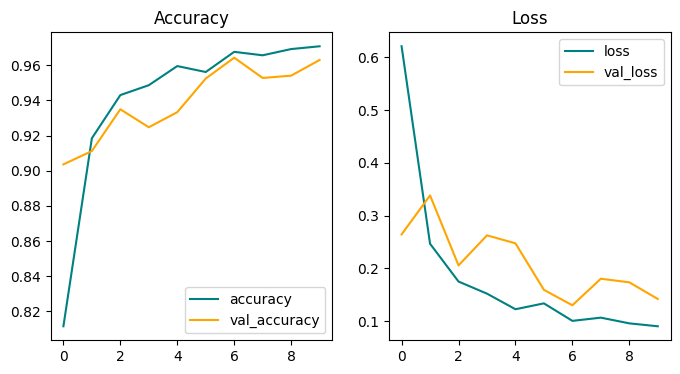

In [26]:
fig, ax = plt.subplots(1,2, figsize = (8, 4))

ax[0].plot(hist.history['accuracy'], color='teal', label='accuracy')
ax[0].plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
ax[0].set_title('Accuracy', fontsize=12)
ax[0].legend(loc="lower right")

ax[1].plot(hist.history['loss'], color='teal', label='loss')
ax[1].plot(hist.history['val_loss'], color='orange', label='val_loss')
ax[1].set_title('Loss', fontsize=12)
ax[1].legend(loc="upper right")

fig.show()

In [31]:
test_score = model.evaluate(test_ds)

94/94 [==============================] - 9s 87ms/step - loss: 0.1278 - accuracy: 0.9610


In [43]:
print(f"The model loss : {test_score[0]}")
print(f"The model accuracy : {np.round(test_score[1], 3) * 100}%")

The model loss : 0.1278439611196518
The model accuracy : 96.1%


# Saving Model

In [ ]:
model.save(os.path.join('drive/MyDrive', 'EfficientNetB0_classifier.h5'))